In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from SPARQLWrapper import SPARQLWrapper, JSON

%matplotlib inline

In [2]:
# :%s/"^^<http:\/\/www.w3.org\/2001\/XMLSchema#double>\ .//g
# :%s/>\ <http:\/\/purl.org\/voc\/vrank#pagerank>\ "/|/g
# :%s/<http:\/\/dbkwik.webdatacommons.org/http:\/\/dbkwik.webdatacommons.org/g

df = pd.read_csv('dbkwik_ranks.csv', sep='|')

In [3]:
df.head()

,resource,rank
0,http://dbkwik.webdatacommons.org/Lostpedi/reso...,0.150000
1,http://dbkwik.webdatacommons.org/Recipes_Wik/r...,0.150000
2,http://dbkwik.webdatacommons.org/Inazuma_Eleve...,0.150000
3,http://dbkwik.webdatacommons.org/Hey_Kids_Comi...,0.199211
4,http://dbkwik.webdatacommons.org/Wikianswer/re...,0.150000


In [4]:
resource = df['resource']

def get_wiki(row):
    return row['resource'].split('/')[3]

df['wiki'] = df.apply(lambda row : get_wiki(row), axis = 1)

In [6]:
df.to_csv('dbkwik_ranks_with_wiki.csv', sep='|')

In [40]:
wiki_freq = df['wiki'].value_counts()
print(len(wiki_freq))

200


/Users/rgathrey/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


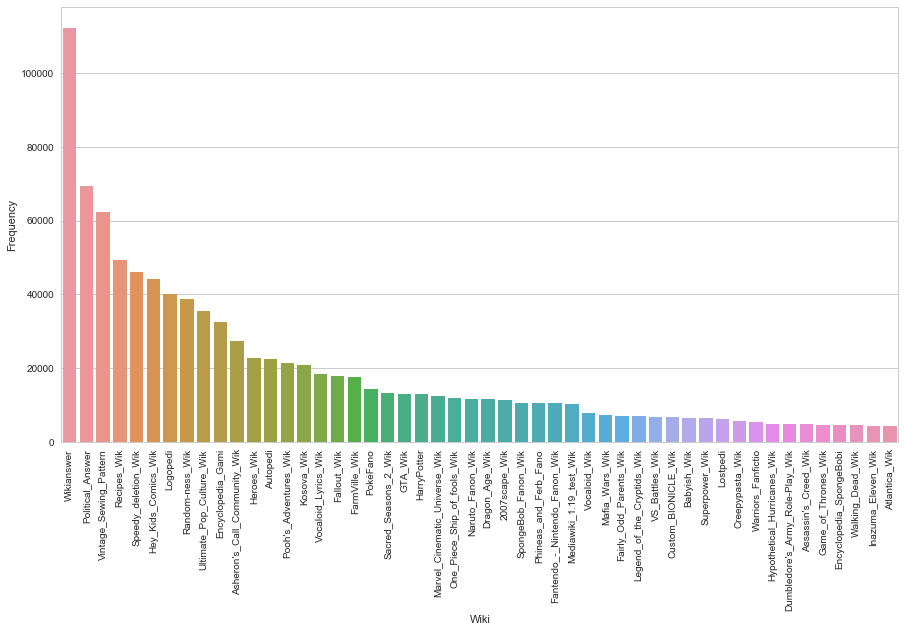

In [8]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(15, 8))

freq = 50

sns_plot = sns.barplot(x=wiki_freq.index[:freq], y=wiki_freq[:freq])
sns_plot.set_ylabel('Frequency')
sns_plot.set_xlabel('Wiki')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
sns_plot.get_figure().savefig('wiki_frequency.png')

In [9]:
x = pd.cut(df['rank'], 10)

In [10]:
pd.options.display.max_colwidth = 100
max_pagerank = max(df['rank'])
min_pagerank = min(df['rank'])
print(max_pagerank, min_pagerank)
print(df[df['rank'] == 2929793.275969105]['resource'])
print(len(df))

21653.520013291047 0.15
Series([], Name: resource, dtype: object)
1070028


/Users/rgathrey/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[1070006, 16, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
7578.83 to 8661.5


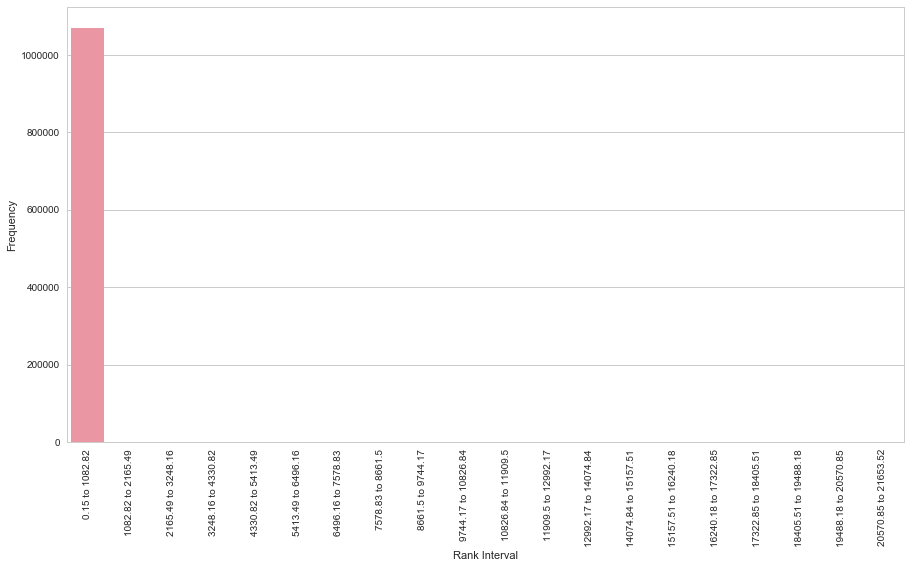

In [11]:
slices = 20
d = (max_pagerank - min_pagerank) / slices
x = []
y = []
# x = ['0.15 to 10000']
# y = [len(df[ (df['rank'] >= 0.15) & (df['rank'] <= 10000)])]
for i in range(slices):
    start = min_pagerank + d * i
    end = min_pagerank + d * (i + 1)
    x.append(str(round(start, 2)) + ' to ' + str(round(end, 2)))
    y.append(len(df[ (df['rank'] >= start) & (df['rank'] <= end)]))

plt.figure(figsize=(15, 8))
    
sns_plot = sns.barplot(x=x, y=y)
sns_plot.set_ylabel('Frequency')
sns_plot.set_xlabel('Rank Interval')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
sns_plot.get_figure().savefig('rank_frequency.png')    

print(y)
print(x[7])

/Users/rgathrey/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


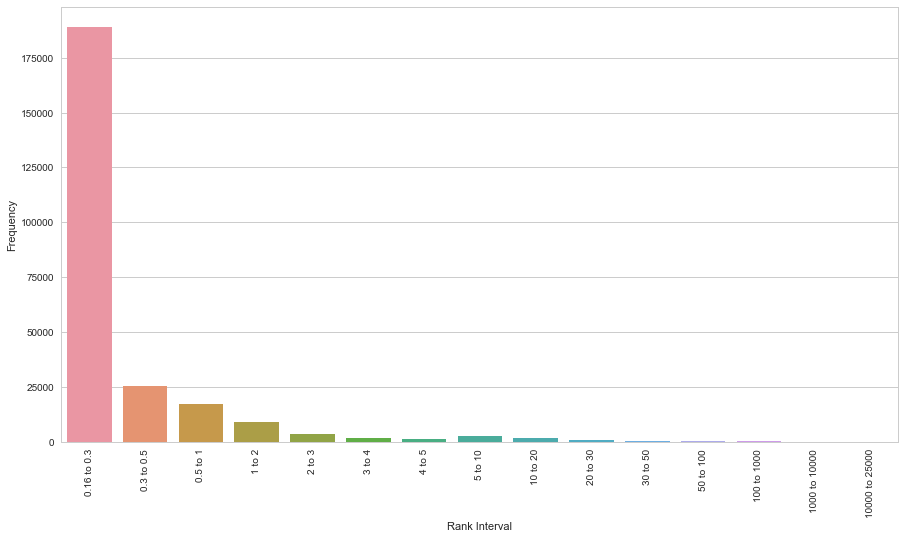

In [24]:

# bins = ([0.15, 0.16, 100, 1000, 1005, 50000, 75000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 
#         700000, 750000, 800000, 850000, 900000, 950000, 1000000])

bins = [0.16, 0.3, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 50, 100, 1000, 10000, 25000]
x = []
y = []

for i in  range(len(bins) - 1):
    start = bins[i]
    end = bins[i + 1]
    x.append(str(round(start, 2)) + ' to ' + str(round(end, 2)))
    y.append(len(df[ (df['rank'] >= start) & (df['rank'] < end)]))

plt.figure(figsize=(15, 8))
    
sns_plot = sns.barplot(x=x, y=y)
sns_plot.set_ylabel('Frequency')
sns_plot.set_xlabel('Rank Interval')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
sns_plot.get_figure().savefig('rank_frequency.png') 

In [25]:
y

[188859,
 25263,
 17237,
 8789,
 3293,
 1783,
 1131,
 2578,
 1430,
 558,
 426,
 313,
 304,
 21,
 1]

In [137]:
x[5]

'963785.83 to 1156542.97'

In [225]:
df[(df['rank'] >= 100) & (df['rank'] < 10000)].sort_values(by=['rank'], ascending=False)

,resource,rank,wiki
673275,http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Category:Planets,9994.939909,The_Babylon_Projec
217612,http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Children_of_the_Cathedral,9955.123550,Fallout_Wik
249018,http://dbkwik.webdatacommons.org/HarryPotter/resource/England,9954.329481,HarryPotter
665235,http://dbkwik.webdatacommons.org/Bleach_Wik/resource/White_Invasion,9952.167114,Bleach_Wik
300234,http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Mark's_Minions,9937.839656,Phineas_and_Ferb_Fano
905721,http://dbkwik.webdatacommons.org/Recipes_Wik/resource/Category:North_Indian_Meat_Dishes,9937.167939,Recipes_Wik
872330,http://dbkwik.webdatacommons.org/Recipes_Wik/resource/Category:North_Indian_Vegetarian,9936.861939,Recipes_Wik
454445,http://dbkwik.webdatacommons.org/Mafia_Wars_Wik/resource/Category:Non-Giftable,9936.827255,Mafia_Wars_Wik
125710,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Rob_Paulsen,9936.215428,Fairly_Odd_Parents_Wik
769319,http://dbkwik.webdatacommons.org/Recipes_Wik/resource/Category:North_Indian_Snacks,9934.133439,Recipes_Wik


In [27]:
freq = pd.read_csv('dbkwik_frequencies.csv', sep='|')

In [38]:
freq['ratio'] = freq['outgoing'] * freq['incoming'] / (freq['outgoing'] + freq['incoming'])

In [39]:
freq[(~freq['resource'].str.contains('Category')) & (freq['resource'].str.contains('/resource/'))].sort_values(by=['ratio'], ascending=False)

,resource,incoming,outgoing,total,ratio
669535,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Timmy_Turner,185,101,286,65.332168
140881,http://dbkwik.webdatacommons.org/HarryPotter/resource/Harry_Potter,122,92,214,52.448598
138746,http://dbkwik.webdatacommons.org/Mafia_Wars_Wik/resource/Mastery_Rewards,143,75,218,49.197248
699377,http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/S.H.I.E.L.D.,202,65,267,49.176030
744161,http://dbkwik.webdatacommons.org/The_Lord_of_the_Rings_Minecraft_Mod_Wik/resource/Factions,141,75,216,48.958333
636410,http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Adam_Williams,113,84,197,48.182741
761368,http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Phineas_Flynn,168,67,235,47.897872
941949,http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/North_America,370,55,425,47.882353
258973,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Cosmo,104,73,177,42.892655
1050899,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Wanda,97,76,173,42.612717


In [89]:
resources = freq[(~freq['resource'].str.contains('Category')) & (freq['resource'].str.contains('/resource/'))].sort_values(by=['ratio'], ascending=False)[:5000]

In [90]:
def get_types(URI):
    sparql = SPARQLWrapper("http://dbkwik.webdatacommons.org/sparql")
    sparql.setQuery("""
        SELECT ?types
        WHERE { <""" + URI + """> rdf:type ?types }
    """)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    
    types = []
    for result in results["results"]["bindings"]:
        if result['types']['value'].startswith('http://dbkwik.webdatacommons.org/') and '/ontology/' in result['types']['value']:
            types.append(result['types']['value'].split('/')[-1])
    return ','.join(types)

In [92]:
resource_list = resources['resource'].tolist()
rdf_types = []

for index in range(len(resource_list)):
    rdf_types.append(get_types(resource_list[index]))
    print(resource_list[index])
    
print(rdf_types)

http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Timmy_Turner
http://dbkwik.webdatacommons.org/HarryPotter/resource/Harry_Potter
http://dbkwik.webdatacommons.org/Mafia_Wars_Wik/resource/Mastery_Rewards
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/S.H.I.E.L.D.
http://dbkwik.webdatacommons.org/The_Lord_of_the_Rings_Minecraft_Mod_Wik/resource/Factions
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Adam_Williams
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Phineas_Flynn
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/North_America
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Cosmo
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Wanda
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Europe
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Isabella_Garcia_Shapiro
http://dbkwik.webdatacommons.org/HarryPotter/resource/A

http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Ben_Tennyson
http://dbkwik.webdatacommons.org/Assassin's_Creed_Wik/resource/Rome
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/List_of_Minor_Characters
http://dbkwik.webdatacommons.org/Autopedi/resource/Team_McLaren
http://dbkwik.webdatacommons.org/Autopedi/resource/Brabham
http://dbkwik.webdatacommons.org/Autopedi/resource/Alain_Prost
http://dbkwik.webdatacommons.org/Autopedi/resource/Stirling_Moss
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Linda_Flynn-Fletcher
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Zeta
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Notable_Zombies_(TV_Series)
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Jorgen_Von_Strangle
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Junktown
http://dbkwik.webdatacommons.org/SpongeBob_Fanon_Wik/resource/Leader_Plankton!
http://dbkwik.webdatacommons.org/Autopedi/resource/Renault_F

http://dbkwik.webdatacommons.org/GTA_Wik/resource/Knife
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/The_Fairly_OddParents!
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Grant_Ward
http://dbkwik.webdatacommons.org/HarryPotter/resource/Gilderoy_Lockhart
http://dbkwik.webdatacommons.org/Autopedi/resource/Red_Bull_Racing
http://dbkwik.webdatacommons.org/Autopedi/resource/Eddie_Irvine
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Tekken_series
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Kevin_Levin
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Zombies
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/PlayStation_2
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/KAITO
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Square_(company)
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Boneyard
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Africa
http://dbk

http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Great_Khans
http://dbkwik.webdatacommons.org/GTA_Wik/resource/GTA_Online_Protagonist
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Little_Lamplight
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Human
http://dbkwik.webdatacommons.org/Call_of_Duty_Wik/resource/United_States_Army
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Utsu-P
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Desert
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Arnim_Zola
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Pegorino_Crime_Family
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Suzy_Johnson
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/Dark_Horse_Comics
http://dbkwik.webdatacommons.org/Lostpedi/resource/Jacob
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Westside
http://dbkwik.webdatacommons.org/Bleach_Wik/resource/Ryoka_Invasion
http://dbkwik.web

http://dbkwik.webdatacommons.org/Autopedi/resource/Emanuele_Pirro
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Great_Forest
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Craster
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Agility
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Gravios
http://dbkwik.webdatacommons.org/Autopedi/resource/Hermann_Lang
http://dbkwik.webdatacommons.org/Lostpedi/resource/Alex_Rousseau
http://dbkwik.webdatacommons.org/Fantendo_-_Nintendo_Fanon_Wik/resource/Hammer_Bro.
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Paradise_Falls
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/VY1
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Peperon-P
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Mandy_Williams
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Blonda_Fairywinkle
http://dbkwik.webdatacommons.org/Fantendo_-_Nintendo_Fanon_Wik/resource/Boo
http://dbkwik.

http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Brøderbund
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Hades
http://dbkwik.webdatacommons.org/Autopedi/resource/Bernd_Rosemeyer
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Nellis_Air_Force_Base
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Vertigo_(DC_Comics)
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Wii
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Ichika
http://dbkwik.webdatacommons.org/Fantendo_-_Nintendo_Fanon_Wik/resource/Luigi
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/England
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Ann-Melts_P
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Mikito-P
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Sirena_Irwin
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Washington,_D.C.
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/

http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Drazi_Freehold
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Sidu
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Cognoscenti
http://dbkwik.webdatacommons.org/Call_of_Duty_Wik/resource/Knife
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Qyburn
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Anti-Fairies
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Red_Skull
http://dbkwik.webdatacommons.org/The_Simpsons_Tapped_Out_Wik/resource/Homer
http://dbkwik.webdatacommons.org/Call_of_Duty_Wik/resource/BAR
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Maze
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Los_Santos_Vagos_(HD_Universe)
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Monster_Hunter_3
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/The_Learning_Company
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Chiron
htt

http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Plesioth
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/War_of_the_Five_Kings
http://dbkwik.webdatacommons.org/GTA_Wik/resource/United_States_of_America
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Tara_Strong
http://dbkwik.webdatacommons.org/One_Piece_Ship_of_fools_Wik/resource/Hiro_Xanthe
http://dbkwik.webdatacommons.org/Autopedi/resource/Hans-Joachim_Stuck
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Ie_no_Ura_de_Manbou_ga_ShinderuP
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Professor_Paradox
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Big_Town
http://dbkwik.webdatacommons.org/GTA_Wik/resource/PCJ_600
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Earthgov
http://dbkwik.webdatacommons.org/Total_Drama_Wik/resource/Harold
http://dbkwik.webdatacommons.org/Shake_It_Up_Wik/resource/Dina_Garcia
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/reso

http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/SONiKA
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Atari
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Vilgax
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Bad_Ben
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Petrovic_Mafiya
http://dbkwik.webdatacommons.org/Autopedi/resource/Watkins_Glen_International
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Gendrome
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Hermes
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Francis_Monogram
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Babylon_5
http://dbkwik.webdatacommons.org/Call_of_Duty_Wik/resource/OpFor
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Dorne
http://dbkwik.webdatacommons.org/HarryPotter/resource/Hogwarts_School_of_Witchcraft_and_Wizardry
http://dbkwik.webdatacommons.org/HarryPotter/resource/Death_Eaters
http://dbkwik.webdatacommon

http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Last_Note.
http://dbkwik.webdatacommons.org/Assassin's_Creed_Wik/resource/London
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Science_fiction_comics
http://dbkwik.webdatacommons.org/Autopedi/resource/Al_Holbert
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Benzarro
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Live-P
http://dbkwik.webdatacommons.org/Total_Drama_Wik/resource/Killer_Bass
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Kirin
http://dbkwik.webdatacommons.org/Mafia_Wars_Wik/resource/Weapons_Depot
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Atari_Jaguar
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Gideon_Malick
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Brotherhood_Outcasts
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Komine
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Combat_Shotgun
http://dbkwik.webdatacom

http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Bull-E
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/MAYU
http://dbkwik.webdatacommons.org/Lostpedi/resource/Miles_Straume
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/ワールドイズマイン_(World_is_Mine)
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Khans
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Robert_Kanigher
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Admiral
http://dbkwik.webdatacommons.org/SpongeBob_Fanon_Wik/resource/Back_To_Slack
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Ultron
http://dbkwik.webdatacommons.org/Mafia_Wars_Wik/resource/Gift_Mastery_Events
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Steve_Marmel
http://dbkwik.webdatacommons.org/Fantendo_-_Nintendo_Fanon_Wik/resource/Toad_(species)
http://dbkwik.webdatacommons.org/Autopedi/resource/Cooper_Car_Company
http://dbkwik.webdatacommons.org/Le_Miiverse_Resource_Wik/r

http://dbkwik.webdatacommons.org/Autopedi/resource/Indianapolis_Motor_Speedway
http://dbkwik.webdatacommons.org/Autopedi/resource/Penske_Racing
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/The_Jerkinators!
http://dbkwik.webdatacommons.org/HarryPotter/resource/Remus_Lupin
http://dbkwik.webdatacommons.org/Assassin's_Creed_Wik/resource/Republic_of_Venice
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Stimpak_(Fallout:_New_Vegas)
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Robert_Kirkman
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Schnozmo_Cosma
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Image_Comics
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Charlie_Adlard
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Mega-City_One
http://dbkwik.webdatacommons.org/Autopedi/resource/Mercedes-Benz
http://dbkwik.webdatacommons.org/Future_Card_Buddyfight_Wik/resource/Kiri_Hyoryu
http://dbkwik.webdata

http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Daisy_Hernandez
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Merle_Dixon_(TV_Series)
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Blitz_Games
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Composite_Weapons_Quest
http://dbkwik.webdatacommons.org/Autopedi/resource/Formula_One
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Earthforce_Marine_Corps
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Nick_Williams
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Miss_Appear
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/HELIOS_One
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Maesters
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Sniper_Rifle
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Organization_Without_a_Cool_Acronym
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Altaro

http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Sneak_(skill)
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Dragons
http://dbkwik.webdatacommons.org/Autopedi/resource/Malaysian_Grand_Prix
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Fiends
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/Tetsuya_Nomura
http://dbkwik.webdatacommons.org/Autopedi/resource/Minardi
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Arzuros
http://dbkwik.webdatacommons.org/Smashpedi/resource/Mario_(SSBWU/3DS)
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Sweet_Johnson
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Feltzer
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Valyrians
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Tama
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Hiyama_Kiyoteru
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Monster_Hunter_G
http://dbkwik.webdatacommons.org/GTA_Wik/resou

http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/CP_System
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Lincoln_Memorial
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Lionhead_Studios
http://dbkwik.webdatacommons.org/Autopedi/resource/Porsche_in_motorsport
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Ra
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Kemu
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Crocker_of_Gold
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Dyuragaua
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/AETA
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Coulson's_Team
http://dbkwik.webdatacommons.org/SpongeBob_Fanon_Wik/resource/The_Krusty_Crew_Shorts
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Thor_Williams
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/The_Temple_of_Liazk_Itzi
http://dbkwik.webdatacommons.org/G

http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Whitney_Frost
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/BUZZ
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Landon_Ricketts
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Milly
http://dbkwik.webdatacommons.org/PokéFano/resource/Sugar_Gem
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Agent_14
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Centauri_Prime
http://dbkwik.webdatacommons.org/PokéFano/resource/Genesin
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Nem
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Destroy_the_Mutant_leader
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Jumbo_Shrimp
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Hinata_Haruhana
http://dbkwik.webdatacommons.org/FarmVille_Wik/resource/Sheep_Pen
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Squidward_Tentacles
http://dbkwik.web

http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Volume_17:_Something_To_Fear
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Monster_Hunter_Freedom
http://dbkwik.webdatacommons.org/Autopedi/resource/British_Racing_Motors
http://dbkwik.webdatacommons.org/HarryPotter/resource/House_of_Black
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Daran_Norris
http://dbkwik.webdatacommons.org/Shake_It_Up_Wik/resource/Start_It_Up
http://dbkwik.webdatacommons.org/Kosova_Wik/resource/Ioannina_Prefecture
http://dbkwik.webdatacommons.org/Autopedi/resource/Adelaide_Street_Circuit
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Poseidon_Energy
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/New_Jersey
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Second_Dark_Elf_Conflict
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Cupid
http://dbkwik.webdatacommons.org/The_Simpsons_Tapped_Out_Wik/resource

http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/メルト_(Melt)
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Big_Wanda
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Glenn_Talbot
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Volume_11:_Fear_The_Hunters
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/＊ハロー、プラネット。_(*Hello,_Planet.)
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Greek_Gods
http://dbkwik.webdatacommons.org/Autopedi/resource/Mark_Blundell
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/White_Walkers
http://dbkwik.webdatacommons.org/Mafia_Wars_Wik/resource/Armory
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Psi_Corps
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Joffrey_Baratheon
http://dbkwik.webdatacommons.org/Smashpedi/resource/Unlockable_(disambiguation)
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Wonder_Gal_(alter-ego)
http://dbkwik

http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Chosen_One
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Taishi
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Falls_Church
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Yo-Yo_Rodriguez
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Uptown_Yardies
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Lee_Everett_(Video_Game)
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Vault-Tec_Corporation
http://dbkwik.webdatacommons.org/FarmVille_Wik/resource/Bull
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Geraldine_Waxelplax
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Still_in_the_Dark
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Luis_Fernando_Lopez
http://dbkwik.webdatacommons.org/Smashpedi/resource/Pit
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Stan_Ivanov
http://dbkwik.webdatacommons.org/Yogscast_Wik/resource/Chris_Lovasz
http:

http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Utatane_Piko
http://dbkwik.webdatacommons.org/FarmVille_Wik/resource/Aviary
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Earth
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Impenetrability_(Spell)
http://dbkwik.webdatacommons.org/FarmVille_Wik/resource/Pet_Run
http://dbkwik.webdatacommons.org/Atlantica_Wik/resource/Quest
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Coordination_(Spell)
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Activision
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Weeping_Weapons
http://dbkwik.webdatacommons.org/Total_Drama_Wik/resource/Brick
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Oldtown
http://dbkwik.webdatacommons.org/Total_Drama_Wik/resource/Ezekiel
http://dbkwik.webdatacommons.org/HarryPotter/resource/Tom
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Malibu_

http://dbkwik.webdatacommons.org/GTA_Wik/resource/Doherty_Garage
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Blizzard
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Merry_Wishmas
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Dragonstone_(island)
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Satoimo
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Centipede_Project
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Granger
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Baller
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Darwyn_Cooke
http://dbkwik.webdatacommons.org/GTA_Wik/resource/C.R.A.S.H.
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Gryff_Whitehill
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/IO_Interactive
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Copper_Blangonga
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Ac

http://dbkwik.webdatacommons.org/Fantendo_-_Nintendo_Fanon_Wik/resource/Sledge_Bro.
http://dbkwik.webdatacommons.org/Autopedi/resource/Andy_Wallace
http://dbkwik.webdatacommons.org/Autopedi/resource/Tyrrell_Racing
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Obella_Sand
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Squidly_Tentacles
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/No.D
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Elia_Sand
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Brandon_Kruse
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Hatsune_Miku_V3_English
http://dbkwik.webdatacommons.org/Autopedi/resource/Volkswagen_Golf
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/Warner_Bros._Interactive_Entertainment
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Owyn_Lyons
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Issue_120
http://dbkwik.webdatacommons.or

http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Head_of_State
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Felix_Blake
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Luisa_Fortuna
http://dbkwik.webdatacommons.org/Assassin's_Creed_Wik/resource/Thieves
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Paulie's_Revue_Bar
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/United_Media
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Blue_Fang_Games
http://dbkwik.webdatacommons.org/Total_Drama_Wik/resource/Jo
http://dbkwik.webdatacommons.org/Autopedi/resource/Singapore_Grand_Prix
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Keto
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Sweet_Devil
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Centauri
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Vault_City_courtyard
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/This_Is_Your_Wish
h

http://dbkwik.webdatacommons.org/Smashpedi/resource/Pokémon_Stadium_2
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Torrington
http://dbkwik.webdatacommons.org/Cardfight!!_Vanguard_Wik/resource/Emi_Sendou
http://dbkwik.webdatacommons.org/Lostpedi/resource/Michael_Emerson
http://dbkwik.webdatacommons.org/Autopedi/resource/Piero_Taruffi
http://dbkwik.webdatacommons.org/Wings_of_Fire_Wik/resource/Prince_Turtle
http://dbkwik.webdatacommons.org/Wings_of_Fire_Wik/resource/Umber
http://dbkwik.webdatacommons.org/SpongeBob_Fanon_Wik/resource/Tom_Kenny
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Agatha's_Song
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/J.A.R.V.I.S.
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Cheetah
http://dbkwik.webdatacommons.org/2007scape_Wik/resource/Nardah
http://dbkwik.webdatacommons.org/Lostpedi/resource/Damon_Lindelof
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Jack_Thomas
http://dbkwik.webdatacommons.o

http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Good_Natured
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Tommy_Turner_(wish)
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Sanderson
http://dbkwik.webdatacommons.org/Smashpedi/resource/Marth
http://dbkwik.webdatacommons.org/Autopedi/resource/Luigi_Chinetti
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Aradesh
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Joseph_Barbera
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Shigeru_Miyamoto
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/The_Temple_of_Ixir_Zi
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Michelle_Bryan
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/The_Fairly_OddParents:_Season_7_DVD
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Larry_SquarePants
http://dbkwik.webdatacommons.org/Heroes_Wik/resource/Blade_(Puppet_Master)


http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Faye-P
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Diez_Coronas
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/PlayStation_Vita
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Abigail_Marston
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Blazer
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Denver
http://dbkwik.webdatacommons.org/Kosova_Wik/resource/United_Kingdom
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Miranda_Gomez-Shapiro
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Mesa_Grande
http://dbkwik.webdatacommons.org/HarryPotter/resource/Cho_Chang
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Widow's_Patch
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Speeder_(boat)
http://dbkwik.webdatacommons.org/2007scape_Wik/resource/Lunar_Isle
http://dbkwik.webdatacommons.org/The_Lord_of_the_Rings_Minecraft_Mod_Wik/resource/Lothlórien
http://dbkwik.webdatacommons.o

http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Lucio
http://dbkwik.webdatacommons.org/Wings_of_Fire_Fanon_Wik/resource/Crystal
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Nintendo_DSi
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/KASANE
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Out_of_survice
http://dbkwik.webdatacommons.org/Total_Drama_Wik/resource/Team_Amazon
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/リモコン_(Rimokon)
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/The_Hightower
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Wolfsbane
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Billy_Bob_Bean
http://dbkwik.webdatacommons.org/Shake_It_Up_Wik/resource/Tinka_Hessenheffer
http://dbkwik.webdatacommons.org/The_Lord_of_the_Rings_Minecraft_Mod_Wik/resource/Iron_Hills
http://dbkwik.webdatacommons.org/Smashpedi/resource/Sheik_(SSBWU/3DS)
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Li

http://dbkwik.webdatacommons.org/Autopedi/resource/Tata
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/House_Hoare
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Grandma_Cosma
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Super_Mario_Bros._3
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Famous_Studios
http://dbkwik.webdatacommons.org/Lostpedi/resource/Alan_Dale
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/The_Path_of_Sorrows
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/The_Fairly_OddParents:_Season_6,_Vol._1_DVD
http://dbkwik.webdatacommons.org/Assassin's_Creed_Wik/resource/British_Empire
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Sadie_Kane
http://dbkwik.webdatacommons.org/GTA_Wik/resource/The_Four_Dragons_Casino
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Sicilian_Mafia
http://dbkwik.webdatacommons.org/Bleach_Wik/resource/Izuru_Kira_vs._Kazeshini
http://dbkwik.webdataco

http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Tootie_(23_years_old)
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Princess_Mandie
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Glasses
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Bleed_Me_Dry
http://dbkwik.webdatacommons.org/Lostpedi/resource/Diane_Janssen
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Eleonora's_Heart_Quest
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Kenny_(Video_Game)
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Paving_the_Way
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Action_(fiction)
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Patron
http://dbkwik.webdatacommons.org/Heroes_Wik/resource/Tunneler
http://dbkwik.webdatacommons.org/Smashpedi/resource/Skyworld
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Anteka
http://dbkwik.webdatacommons.org/Total_Drama_Wik/resou

http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Volition,_Inc.
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Epsilon_Program_(HD_Universe)
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/ルカルカ★ナイトフィーバー_(Luka_Luka★Night_Fever)
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Federal_government
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Casa_Madrugada
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Gary
http://dbkwik.webdatacommons.org/Autopedi/resource/General_Motors_Astra
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Kanae_Fujishiro
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Dune_Buggy
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Ray_Schoonover
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Matrix_Software
http://dbkwik.webdatacommons.org/Autopedi/resource/Detroit_street_circuit
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Shotgun_(Fallout)
http://dbkwik.webdatacommo

http://dbkwik.webdatacommons.org/GTA_Wik/resource/Shakedown_(GTA_VC)
http://dbkwik.webdatacommons.org/Marvel_Avengers_Alliance_Wik/resource/Special_Operations_-_Vision_of_the_Future
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Outcast_outpost
http://dbkwik.webdatacommons.org/Autopedi/resource/Autodromo_Enzo_e_Dino_Ferrari
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Sumo_Digital
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Ingyo
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/A_Meeting_of_the_Minds
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Camp_McCarran_terminal_building
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Broken_Hills_Downtown
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Shadow_Assault
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/ワールズエンド・ダンスホール_(World's_End_Dancehall)
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Veni,_Vidi,_Vici
http://dbkwik.webdatacommons.org/The_

http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/20th_Century_Fox_Games
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Georgia_(state)
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/John_Deiley
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Uroktor
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Abraham_Ford_(TV_Series)
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Ben_10:_Omniverse
http://dbkwik.webdatacommons.org/Smashpedi/resource/Pac-Man
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Rip_Off_Press
http://dbkwik.webdatacommons.org/Wings_of_Fire_Fanon_Wik/resource/Squish
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/The_Fairly_OddParents!_(episode)
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Tide_Island
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Flamethrower
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Silver_Hypnocatrice
http://dbkwik.w

http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Barrows
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Caleb_Smith
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Andale
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/CP_System_II
http://dbkwik.webdatacommons.org/Plants_vs._Zombies_Wik/resource/Engineer
http://dbkwik.webdatacommons.org/Wings_of_Fire_Wik/resource/Princess_Burn
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Roger_Westin
http://dbkwik.webdatacommons.org/Bleach_Wik/resource/Gin_Ichimaru
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Ebbert_Whitehill
http://dbkwik.webdatacommons.org/Autopedi/resource/Gumpert_Apollo
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/John_Maxson
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/P'andor
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/The_Temple_of_Izji_Qo
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Harvesting_the_Bulb_o

http://dbkwik.webdatacommons.org/GTA_Wik/resource/Salvatore's_Gentlemen's_Club
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Valkyrie
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Take_it_Back!
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Newport
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Daemon
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/League_Of_Villainous_Evildoers_Maniacally_United_For_Frightening_Investments_in_Naughtiness
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Find_a_way_into_the_Sierra_Army_Base
http://dbkwik.webdatacommons.org/GTA_Wik/resource/San_Andreas
http://dbkwik.webdatacommons.org/Borderlands_Wik/resource/Triton_Flats
http://dbkwik.webdatacommons.org/Autopedi/resource/United_States_Grand_Prix
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Vice_Point
http://dbkwik.webdatacommons.org/Inazuma_Eleven_Wik/resource/Mannouzaka
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Bandai
http://dbkwik.webdataco

http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Momnipresent
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Get_the_vertibird_plans_for_the_Brotherhood_of_Steel
http://dbkwik.webdatacommons.org/SpongeBob_Fanon_Wik/resource/Spongieux_Productions
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/El_Presidio
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Freebooter_Keep_Black_Market
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Puerto_Rico
http://dbkwik.webdatacommons.org/Autopedi/resource/Circuit_Gilles_Villeneuve
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/Kalypso_Media
http://dbkwik.webdatacommons.org/Speedy_deletion_Wik/resource/James_Vallo
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Metzger
http://dbkwik.webdatacommons.org/GTA_Wik/resource/P-996_LAZER
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Diego_Mendez
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/The_Fairy_Beginning
http:

http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/ColecoVision_Controller
http://dbkwik.webdatacommons.org/2007scape_Wik/resource/Grand_Exchange
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Fealty_(Spell)
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Sprint_(Spell)
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/Wii
http://dbkwik.webdatacommons.org/HarryPotter/resource/Lucius_Malfoy
http://dbkwik.webdatacommons.org/HarryPotter/resource/Honeydukes
http://dbkwik.webdatacommons.org/Autopedi/resource/Richard_Attwood
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Wasteland_Survival_Guide_(quest)
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/Angel_Investigations
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Mike_Rosson
http://dbkwik.webdatacommons.org/Fantendo_-_Nintendo_Fanon_Wik/resource/Ludwig_von_Koopa
http://dbkwik.webdatacommons.org/Autopedi/resource/Masten_Gregory
http:/

http://dbkwik.webdatacommons.org/GTA_Wik/resource/Real_Badman
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Buffalo_Soldier
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Phoenix
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Diabolus
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Kearson_DeWitt
http://dbkwik.webdatacommons.org/Inazuma_Eleven_Wik/resource/El_Dorado_Team_01
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Maureen_Mascarina
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/IGN
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Nekobolo
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/Mass_Effect
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/App_Trap
http://dbkwik.webdatacommons.org/Wings_of_Fire_Fanon_Wik/resource/Morass
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Phineas_Flynn_(Clone)
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/reso

http://dbkwik.webdatacommons.org/Speedy_deletion_Wik/resource/Lorin_Morgan-Richards
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Ninja_Academy
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Ramsay_Bolton
http://dbkwik.webdatacommons.org/Riordan_Wik/resource/Nico_di_Angelo
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Anti-Wanda
http://dbkwik.webdatacommons.org/Cardfight!!_Vanguard_Wik/resource/Kenji_Mitsusada
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Spear_Mastery_(Spell)
http://dbkwik.webdatacommons.org/Mass_Effect_Wik/resource/Earth
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Mayuko
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Corasundae
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/There_Stands_the_Grass
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Roman_Bellic
http://dbkwik.webdatacommons.org/The_Babylon_Projec/resource/Earth-Minbari_War
http://dbkwik.webdataco

http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/The_Assault_on_Fort_Mercer
http://dbkwik.webdatacommons.org/Smashpedi/resource/Wario_(SSBWU/3DS)
http://dbkwik.webdatacommons.org/HarryPotter/resource/Graham_Montague
http://dbkwik.webdatacommons.org/Encyclopedia_Gami/resource/David_Crane
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Unmarked_Cruiser
http://dbkwik.webdatacommons.org/Smashpedi/resource/Research_Facility_(Part_II)
http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Crestwood_Publications
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Releasing_the_Light
http://dbkwik.webdatacommons.org/Atlantica_Wik/resource/Bai_Yigai
http://dbkwik.webdatacommons.org/HarryPotter/resource/Battle_of_the_Department_of_Mysteries
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Aaron_Hammersley
http://dbkwik.webdatacommons.org/Call_of_Duty_Wik/resource/Call_of_Duty_3
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resour

http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Nazyo
http://dbkwik.webdatacommons.org/GTA_Wik/resource/SWAT_Van
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Issue_19
http://dbkwik.webdatacommons.org/Plants_vs._Zombies_Wik/resource/Long_Bomb
http://dbkwik.webdatacommons.org/Naruto_Fanon_Wik/resource/Gaoh_Minazuki
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Bloomfield_Space_Center_design_document
http://dbkwik.webdatacommons.org/Autopedi/resource/Audi_A4
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/ロストワンの号哭_(Lost_One_no_Goukoku)
http://dbkwik.webdatacommons.org/Mafia_Wars_Wik/resource/Secret_Drop
http://dbkwik.webdatacommons.org/PokéFano/resource/Delia_Ketchum_(Aura)
http://dbkwik.webdatacommons.org/Red_Dead_Wik/resource/Ridgewood_Farm
http://dbkwik.webdatacommons.org/2007scape_Wik/resource/Tree_Gnome_Village
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Silver_Rush
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/The_Eyrie
h

http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Batman_(comic_book)
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Walton
http://dbkwik.webdatacommons.org/SpongeBob_Fanon_Wik/resource/Quag
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Weekend_at_Florian's
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Ichinose_Yukino
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Issue_2
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/アカツキアライヴァル_(Akatsuki_Arrival)
http://dbkwik.webdatacommons.org/Monster_Hunter_Wik/resource/Gargwa
http://dbkwik.webdatacommons.org/Smashpedi/resource/Marth_(SSBWU/3DS)
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Weekender_Girl_/_fake_doll
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Kocchi_Muite_Baby_/_Yellow_(こっち向いて_Baby_/_Yellow)
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Brunette_Zealot
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Willowfield
http://dbkwik.webdatacomm

http://dbkwik.webdatacommons.org/The_Lord_of_the_Rings_Minecraft_Mod_Wik/resource/Tauredain_Farmer
http://dbkwik.webdatacommons.org/Yogscast_Wik/resource/Zoey_Proasheck
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Healing_powder_(Fallout:_New_Vegas)
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Verdant_Meadows_Airfield
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Highpoint
http://dbkwik.webdatacommons.org/Fiction_Foundr/resource/Nickelodeon_Family_Movies
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/So_Totally_Spaced_Out
http://dbkwik.webdatacommons.org/Assassin's_Creed_Wik/resource/Byzantine_Empire
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Galapagus
http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/The_Masked_Magician
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Issue_105
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Get_weapons_for_the_Blades
http://dbkwik.webdatacommons.org/Autopedi/reso

http://dbkwik.webdatacommons.org/Hey_Kids_Comics_Wik/resource/Captain_Dynamo
http://dbkwik.webdatacommons.org/2007scape_Wik/resource/Miscellania
http://dbkwik.webdatacommons.org/Borderlands_Wik/resource/The_Dahl_Headlands
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Nothin'_But_a_Hound_Dog
http://dbkwik.webdatacommons.org/Ben_10_Wik/resource/Bivalvan
http://dbkwik.webdatacommons.org/Future_Card_Buddyfight_Wik/resource/Jin_Magatsu
http://dbkwik.webdatacommons.org/The_Simpsons_Tapped_Out_Wik/resource/Season_Premiere_2016_Event
http://dbkwik.webdatacommons.org/Autopedi/resource/Ascari_A10
http://dbkwik.webdatacommons.org/Call_of_Duty_Wik/resource/Team_Deathmatch
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Philip_Flynnski
http://dbkwik.webdatacommons.org/My_Little_Pony_Friendship_is_Magic_Wik/resource/Granny_Smith
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Slaver_(Fallout_3)
http://dbkwik.webdatacommons.org/Game_of_Thrones_Wik/resource/Talla_Tarly
ht

http://dbkwik.webdatacommons.org/SpongeBob_Fanon_Wik/resource/SpongeKid_Adventures
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/からくりピエロ_(Karakuri_Pierrot)
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Redjuice
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Prehistoric_Krabs
http://dbkwik.webdatacommons.org/Walking_Dead_Wik/resource/Frank_Darabont
http://dbkwik.webdatacommons.org/Plants_vs._Zombies_Wik/resource/Dark_Flower
http://dbkwik.webdatacommons.org/GTA_Wik/resource/Fort_Carson
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Blackfoot_Tribe_design_document
http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/Paramount_Pictures
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Shin-P
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Dogs_of_Hell
http://dbkwik.webdatacommons.org/Phineas_and_Ferb_Fano/resource/Monty_Monogram
http://dbkwik.webdatacommons.org/Asheron's_Call_Community_Wik/resource/Month

http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Talkin'_Trash
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Nyanyanyanyanyanyanya!
http://dbkwik.webdatacommons.org/Fallout_Wik/resource/Flamer_fuel_(Fallout:_New_Vegas)
http://dbkwik.webdatacommons.org/Fantendo_-_Nintendo_Fanon_Wik/resource/Nintendo_VR
http://dbkwik.webdatacommons.org/Vocaloid_Wik/resource/Jampan_Japan_Tour!_(じゃむぱん・じゃぱん・つあー！)
http://dbkwik.webdatacommons.org/Regular_Show_Wik/resource/Terror_Tales_of_the_Park_III
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Quan_Chen
http://dbkwik.webdatacommons.org/Encyclopedia_SpongeBobi/resource/Mable-Monica
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Everett_Ross
http://dbkwik.webdatacommons.org/Autopedi/resource/Honda_Civic
http://dbkwik.webdatacommons.org/Smashpedi/resource/Kirby
http://dbkwik.webdatacommons.org/Marvel_Cinematic_Universe_Wik/resource/Adolf_Hitler
http://dbkwik.webdatacommons.org/Marvel_

In [93]:
resources['rdf_types'] = rdf_types

In [94]:
types_freq = {}
for index in range(len(rdf_types)):
    types = rdf_types[index].split(',')
    if len(types) > 0:
        for index2 in range(len(types)):
            if types[index2] in types_freq:
                types_freq[types[index2]] += 1
            else:
                types_freq[types[index2]] = 1
                
print(types_freq)                

{'Agent': 1103, 'FictionalCharacter': 612, 'Person': 873, 'Actor': 29, 'Artist': 46, '': 3565, 'Athlete': 157, 'FormulaOneRacer': 144, 'MotorsportRacer': 157, 'RacingDriver': 156, 'Country': 8, 'Location': 12, 'Place': 12, 'PopulatedPlace': 12, 'FormulaOneTeam': 13, 'Organisation': 230, 'SportsTeam': 14, 'NascarDriver': 8, 'MusicalWork': 254, 'Song': 245, 'Work': 291, 'Company': 197, 'Software': 26, 'VideoGame': 20, 'Device': 27, 'InformationAppliance': 17, 'TelevisionShow': 5, 'Publisher': 19, 'Weapon': 10, 'OfficeHolder': 2, 'Royalty': 2, 'ComicsCharacter': 2, 'MotorcycleRider': 1, 'Jurisdiction%3E': 3, 'AdministrativeRegion': 3, 'Region': 3, 'Broadcaster': 4, 'RadioStation': 2, 'ComicsCreator': 13, 'Album': 9, 'AutoRacingLeague': 1, 'SportsLeague': 1, 'RecordLabel': 1, 'MusicalArtist': 2, 'SoccerClub': 1, 'Film': 1, 'Wikidata:Q11424': 1, 'TelevisionStation': 1, 'Website': 1, 'BroadcastNetwork': 1, 'OrganisationMember': 1, 'SportsTeamMember': 1, 'Comic': 4, 'WrittenWork': 4, 'Settlem

In [98]:
resources[resources['rdf_types'].str.contains('Actor')]

,resource,incoming,outgoing,total,ratio,rdf_types
140881,http://dbkwik.webdatacommons.org/HarryPotter/resource/Harry_Potter,122,92,214,52.448598,"Actor,Agent,Artist,Person"
920468,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Butch_Hartman,195,19,214,17.313084,"Actor,Agent,Artist,Person"
323756,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Tara_Strong,43,12,55,9.381818,"Actor,Agent,Artist,Person"
839209,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Guy_Moon,190,9,199,8.592965,"Actor,Agent,Artist,Person"
634010,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Steve_Marmel,68,9,77,7.948052,"Actor,Agent,Artist,Person"
135498,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Susanne_Blakeslee,24,10,34,7.058824,"Actor,Agent,Artist,Person"
301753,http://dbkwik.webdatacommons.org/Ultimate_Pop_Culture_Wik/resource/John_Carpenter,12,15,27,6.666667,"Agent,Artist,Person,Actor"
1039487,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Daran_Norris,33,8,41,6.439024,"Actor,Agent,Artist,Person"
199559,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Ray_DeLaurentis,54,7,61,6.196721,"Actor,Agent,Artist,Person"
918229,http://dbkwik.webdatacommons.org/Fairly_Odd_Parents_Wik/resource/Heather_Martinez,33,7,40,5.775000,"Actor,Agent,Artist,Person"


In [104]:
print(df['wiki'].unique())

['Lostpedi' 'Recipes_Wik' 'Inazuma_Eleven_Wik' 'Hey_Kids_Comics_Wik'
 'Wikianswer' "Asheron's_Call_Community_Wik" 'Vocaloid_Wik' 'Logopedi'
 'Ultimate_Pop_Culture_Wik' 'Political_Answer' "Assassin's_Creed_Wik"
 'Monster_Hunter_Wik' 'Mediawiki_1.19_test_Wik' 'Autopedi'
 'Fairly_Odd_Parents_Wik' 'Atlantica_Wik' 'Marvel_Cinematic_Universe_Wik'
 'Vintage_Sewing_Pattern' 'Dragon_Age_Wik' 'The_Simpsons_Tapped_Out_Wik'
 '2007scape_Wik' 'Naruto_Fanon_Wik' 'Superpower_Wik' 'Vocaloid_Lyrics_Wik'
 'Random-ness_Wik' "Dumbledore's_Army_Role-Play_Wik"
 'Minecraft_Pocket_Edition_Wik' 'Speedy_deletion_Wik' 'RWBY_Wik'
 'Wings_of_Fire_Fanon_Wik' 'Borderlands_Wik' 'PokéFano' 'Encyclopedia_Gami'
 'GTA_Wik' 'Heroes_Wik' 'Cardfight!!_Vanguard_Wik' 'Real_Racing_3_Wik'
 'Fallout_Wik' 'FarmVille_Wik' 'SpongeBob_Fanon_Wik'
 'LEGO_Message_Boards_Wik' "Pooh's_Adventures_Wik" 'Walking_Dead_Wik'
 'Phineas_and_Ferb_Fano' 'Future_Card_Buddyfight_Wik' 'HarryPotter'
 'Call_of_Duty_Wik' 'Game_of_Thrones_Wik' 'Mafia_Wars